In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

image_path = 'picture.jpeg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Could not load image.")
    exit()

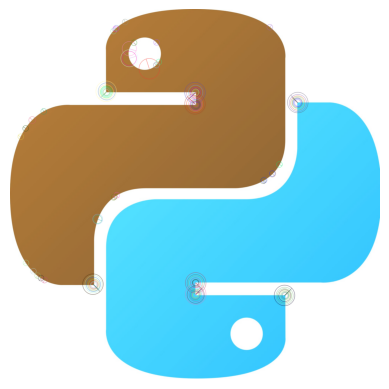

In [16]:
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(image, None)

output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(output_image, cmap='gray')
plt.axis('off')
plt.show()

перевести в grayscale

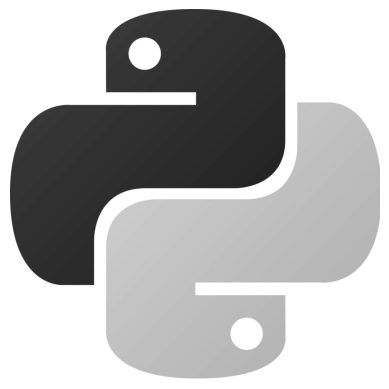

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

найти все sift features точки на изображении

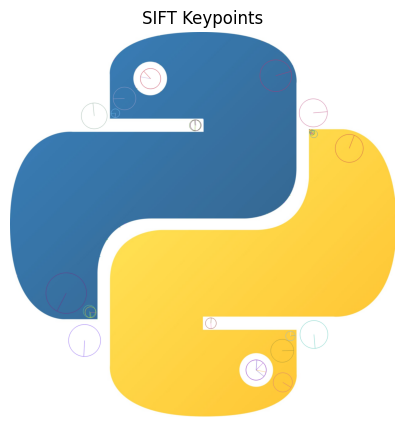

In [4]:
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)
output_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(5, 5))
plt.title('SIFT Keypoints')
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

сделать размытие изображения

In [5]:
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

найти canny edges на изображенни

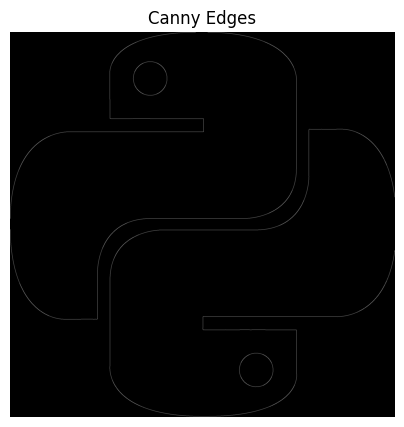

In [6]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

plt.figure(figsize=(5, 5))
plt.title('Canny Edges')
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

перевести изорбражение в hsv

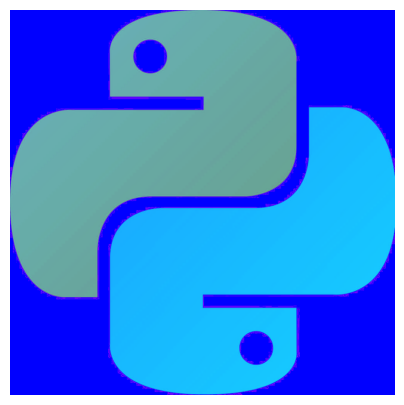

In [7]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(5, 5))
plt.imshow(hsv_image)
plt.axis('off')
plt.show()

отразить изображение по правой границе

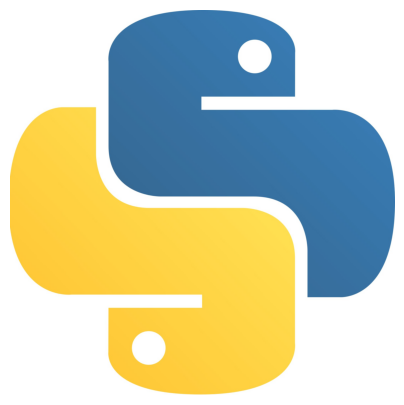

In [14]:
flipped_image_right = cv2.flip(image, 1)
flipped_image_right_rgb = cv2.cvtColor(flipped_image_right, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(flipped_image_right_rgb)
plt.axis('off')
plt.show()

отразить изображение по нижней границе

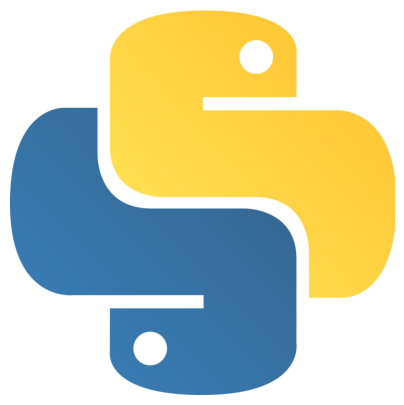

In [15]:
flipped_image_bottom = cv2.flip(image, 0)
flipped_image_bottom_rgb = cv2.cvtColor(flipped_image_bottom, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(5, 5))
plt.imshow(flipped_image_bottom_rgb)
plt.axis('off')
plt.show()

повернуть изображение на 45 градусов

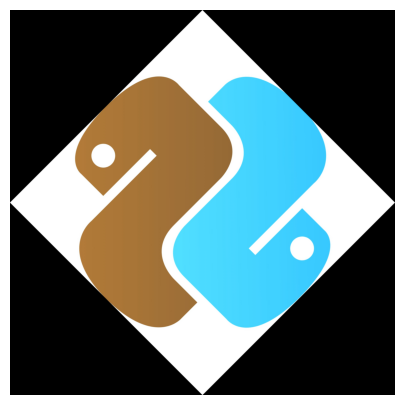

In [16]:
(h, w) = image.shape[:2]
center = (w // 2, h // 2)
angle = 45
scale = 1.0

M = cv2.getRotationMatrix2D(center, angle, scale)

cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

M[0, 2] += (new_w / 2) - center[0]
M[1, 2] += (new_h / 2) - center[1]

rotated_image_45 = cv2.warpAffine(image, M, (new_w, new_h))
plt.figure(figsize=(5, 5))
plt.imshow(rotated_image_45)
plt.axis('off')
plt.show()

повернуть изображение на 30 градусов вокруг заданной точки

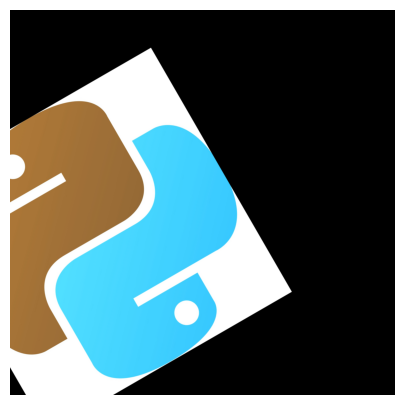

In [17]:
rotation_center = (w - 1, h - 1)
angle = 30
scale = 1.0

M = cv2.getRotationMatrix2D(rotation_center, angle, scale)

cos = np.abs(M[0, 0])
sin = np.abs(M[0, 1])
new_w = int((h * sin) + (w * cos))
new_h = int((h * cos) + (w * sin))

rotated_image_30 = cv2.warpAffine(image, M, (new_w, new_h))
plt.figure(figsize=(5, 5))
plt.imshow(rotated_image_30)
plt.axis('off')
plt.show()

сместить изображение но 10 пикселей вправо

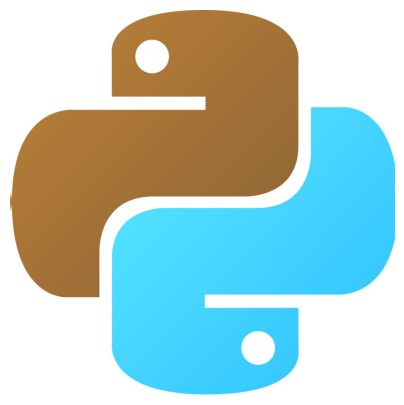

In [18]:
(h, w) = image.shape[:2]
translation_matrix = np.float32([[1, 0, 10], [0, 1, 0]])
rows, cols, ch = image.shape

translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows), borderMode=cv2.BORDER_REPLICATE)
plt.figure(figsize=(5, 5))
plt.imshow(translated_image)
plt.axis('off')
plt.show()

изменить яркость изоббражения

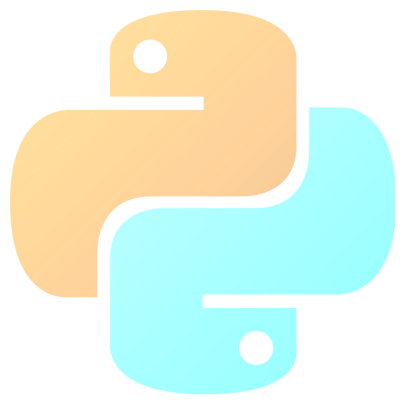

In [19]:
adjusted_image_bright = cv2.convertScaleAbs(image, alpha=1, beta=100)
plt.figure(figsize=(5, 5))
plt.imshow(adjusted_image_bright)
plt.axis('off')
plt.show()

изменить контрасть изображения

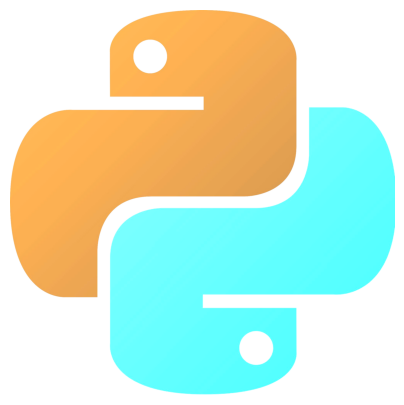

In [20]:
adjusted_image_contrast = cv2.convertScaleAbs(image, alpha=1.5, beta=0)
plt.figure(figsize=(5, 5))
plt.imshow(adjusted_image_contrast)
plt.axis('off')
plt.show()

сделать гамма-перобразование

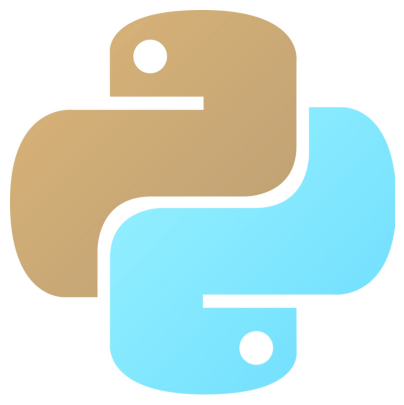

In [21]:
gamma = 2.0
invGamma = 1.0 / gamma
table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")

gamma_corrected_image = cv2.LUT(image, table)
plt.figure(figsize=(5, 5))
plt.imshow(gamma_corrected_image)
plt.axis('off')
plt.show()

сделать гистограмную эквайлизацию

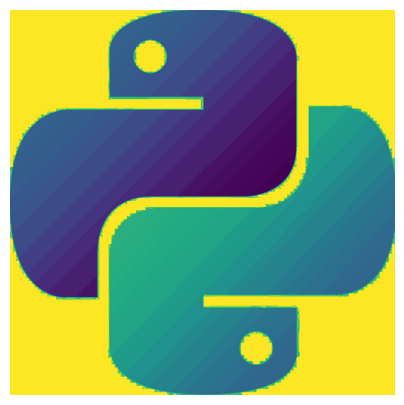

In [22]:
equalized_image = cv2.equalizeHist(gray_image)

plt.figure(figsize=(5, 5))
plt.imshow(equalized_image)
plt.axis('off')
plt.show()

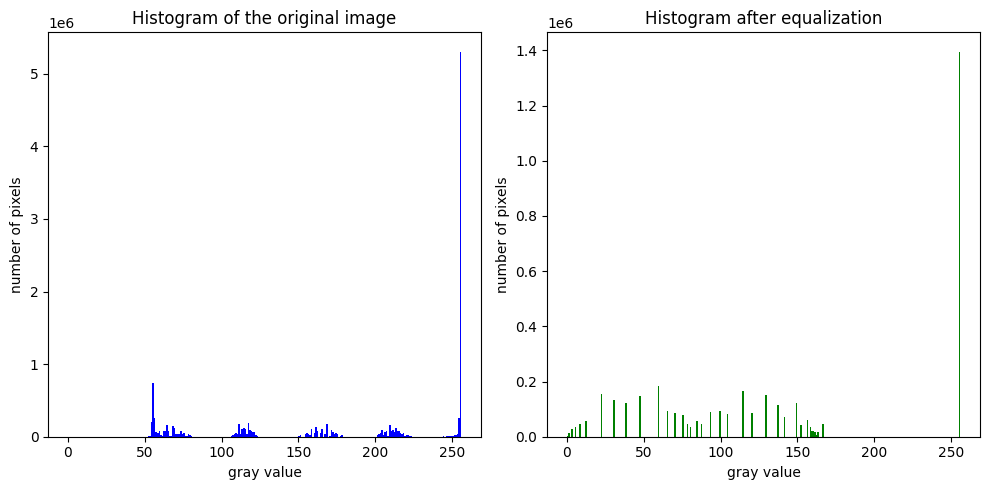

In [70]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Histogram of the original image")
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue')
plt.xlabel("gray value")
plt.ylabel("number of pixels")

plt.subplot(1, 2, 2)
plt.title("Histogram after equalization")
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), color='green')
plt.xlabel("gray value")
plt.ylabel("number of pixels")

plt.tight_layout()
plt.show()

изменить баланс белого

In [84]:
def adjust_white_balance(image, factor):
    image = image.astype(np.float32) / 255.0

    warm_filter = np.array([1 - factor, 1, 1 + factor])
    cold_filter = np.array([1 + factor, 1, 1 - factor])

    if factor > 0:
        image = image * warm_filter
    else:
        image = image * cold_filter

    image = np.clip(image, 0, 1)

    image = (image * 255).astype(np.uint8)
    return image


изменить баланс белого, сделать более "теплую" картинку

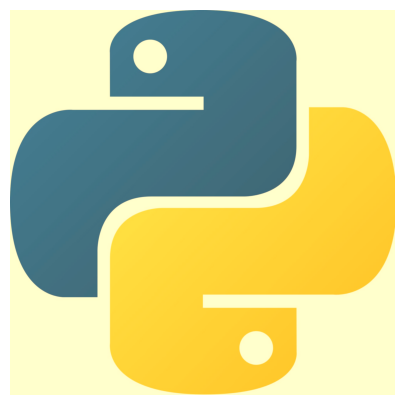

In [85]:
warm_image = adjust_white_balance(image, factor=0.2)
warm_image_rgb = cv2.cvtColor(warm_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(warm_image_rgb)
plt.axis('off')
plt.show()

изменить баланс белого, сделать более "холодную" картинку

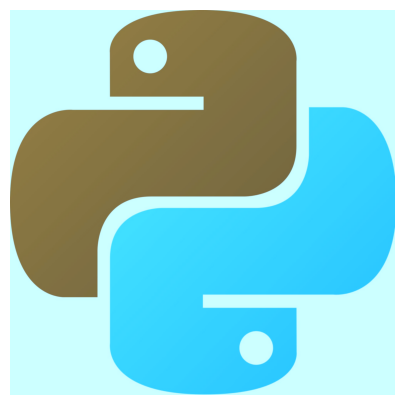

In [86]:
cold_image = adjust_white_balance(image, factor=-0.2)
cold_image_rgb = cv2.cvtColor(cold_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))
plt.imshow(cold_image)
plt.axis('off')
plt.show()

изменить цветовую палитру по заданному шаблону

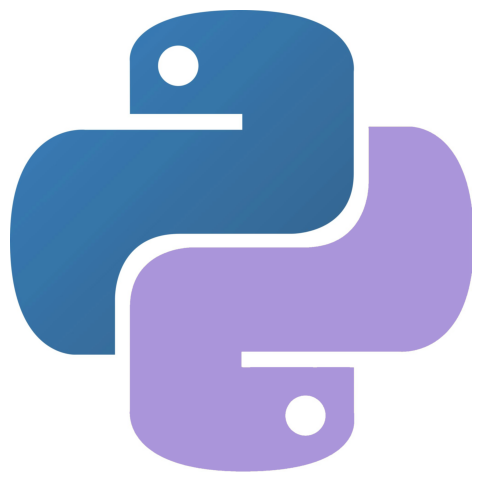

In [24]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def adjust_color_palette(image, template_palette):
    for i, color in enumerate(template_palette):
        h, s, v = cv2.cvtColor(np.uint8([[color]]), cv2.COLOR_RGB2HSV)[0][0]
        mask = cv2.inRange(hsv_image, (i*30, 50, 50), ((i+1)*30, 255, 255))
        hsv_image[mask > 0] = (h, s, v)

    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

template_palette = [
    (170, 150, 218),
    (252, 186, 211),
    (255, 255, 210)
]

result_image = adjust_color_palette(image_rgb, template_palette)

plt.figure(figsize=(6, 6))
plt.imshow(result_image)
plt.axis("off")
plt.show()

сделать бинаризацию изображения

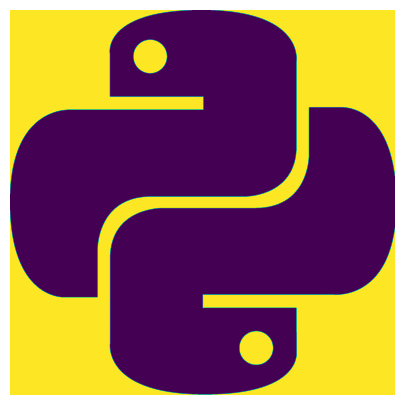

In [35]:
_, binary_image = cv2.threshold(gray_image, 220, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(5, 5))
plt.imshow(binary_image)
plt.axis('off')
plt.show()

найти контуры на бинаризированном изображении

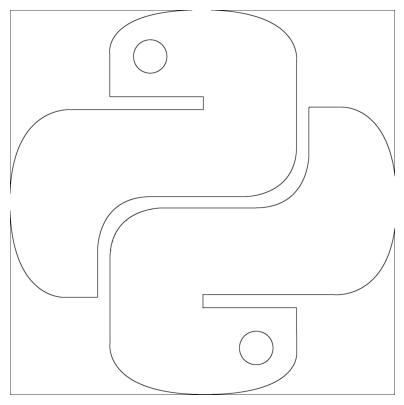

In [36]:
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image_color = cv2.cvtColor(np.zeros_like(gray_image), cv2.COLOR_GRAY2BGR) + 255
cv2.drawContours(image_color, contours, -1, (0, 0, 0), 2)

plt.figure(figsize=(5, 5))
plt.imshow(image_color)
plt.axis('off')
plt.show()

нати контуры на изображении, применив фильтры (Собеля или Лапласиан)

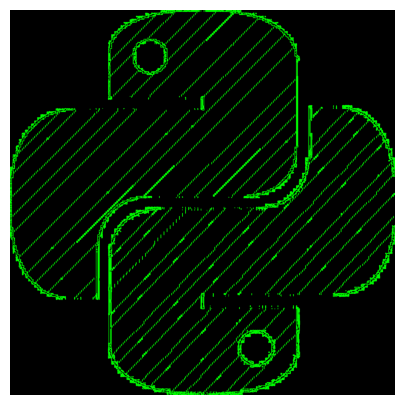

In [37]:
sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
abs_sobelx = np.absolute(sobelx)
sobelx8u = np.uint8(abs_sobelx)
contours, hierarchy = cv2.findContours(sobelx8u, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
contour_image = cv2.cvtColor(np.zeros_like(image), cv2.COLOR_BGR2RGB)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(5, 5))
plt.imshow(contour_image)
plt.axis('off')
plt.show()

сделать фильтрацию изображения при помощи Фурье преобразоваия, оставить только
быстрые частоты

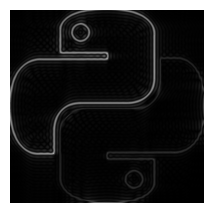

In [10]:
f_transform = np.fft.fft2(gray_image)
f_shift = np.fft.fftshift(f_transform)

rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
radius = 30
mask = np.ones((rows, cols), dtype=np.uint8)
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 0

f_high = f_shift * mask
f_ishift = np.fft.ifftshift(f_high)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = np.abs(filtered_image)

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

сделать фильтрацию изображения при помощи Фурье преобразоваия, оставить только
медленные частоты

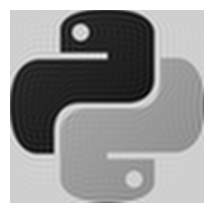

In [11]:
rows, cols = gray_image.shape
crow, ccol = rows // 2, cols // 2
radius = 30
mask = np.zeros((rows, cols), dtype=np.uint8)
mask[crow-radius:crow+radius, ccol-radius:ccol+radius] = 1

f_low = f_shift * mask

f_ishift = np.fft.ifftshift(f_low)
filtered_image = np.fft.ifft2(f_ishift)
filtered_image = np.abs(filtered_image)

plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

применить операцию эрозии к изображению

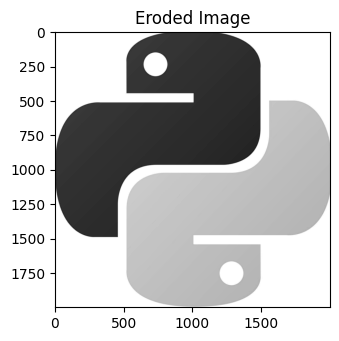

In [14]:
kernel = np.ones((3, 3), np.uint8)
eroded_image = cv2.erode(gray_image, kernel, iterations=1)

plt.subplot(1, 2, 2)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap='gray')
plt.tight_layout()
plt.show()

применить операцию диляции к изображению

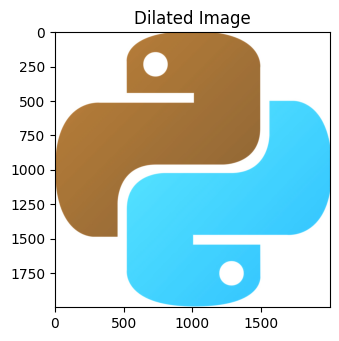

In [15]:
kernel = np.ones((3, 3), np.uint8)
dilated_image = cv2.dilate(image, kernel, iterations=1)

plt.subplot(1, 2, 2)
plt.title('Dilated Image')
plt.imshow(dilated_image, cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')